In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import ipywidgets as widgets

np.random.seed(0)


In [44]:
n = 10 # burn-in period
N = 10000

# Correlation between X and Y
rho = 0.5


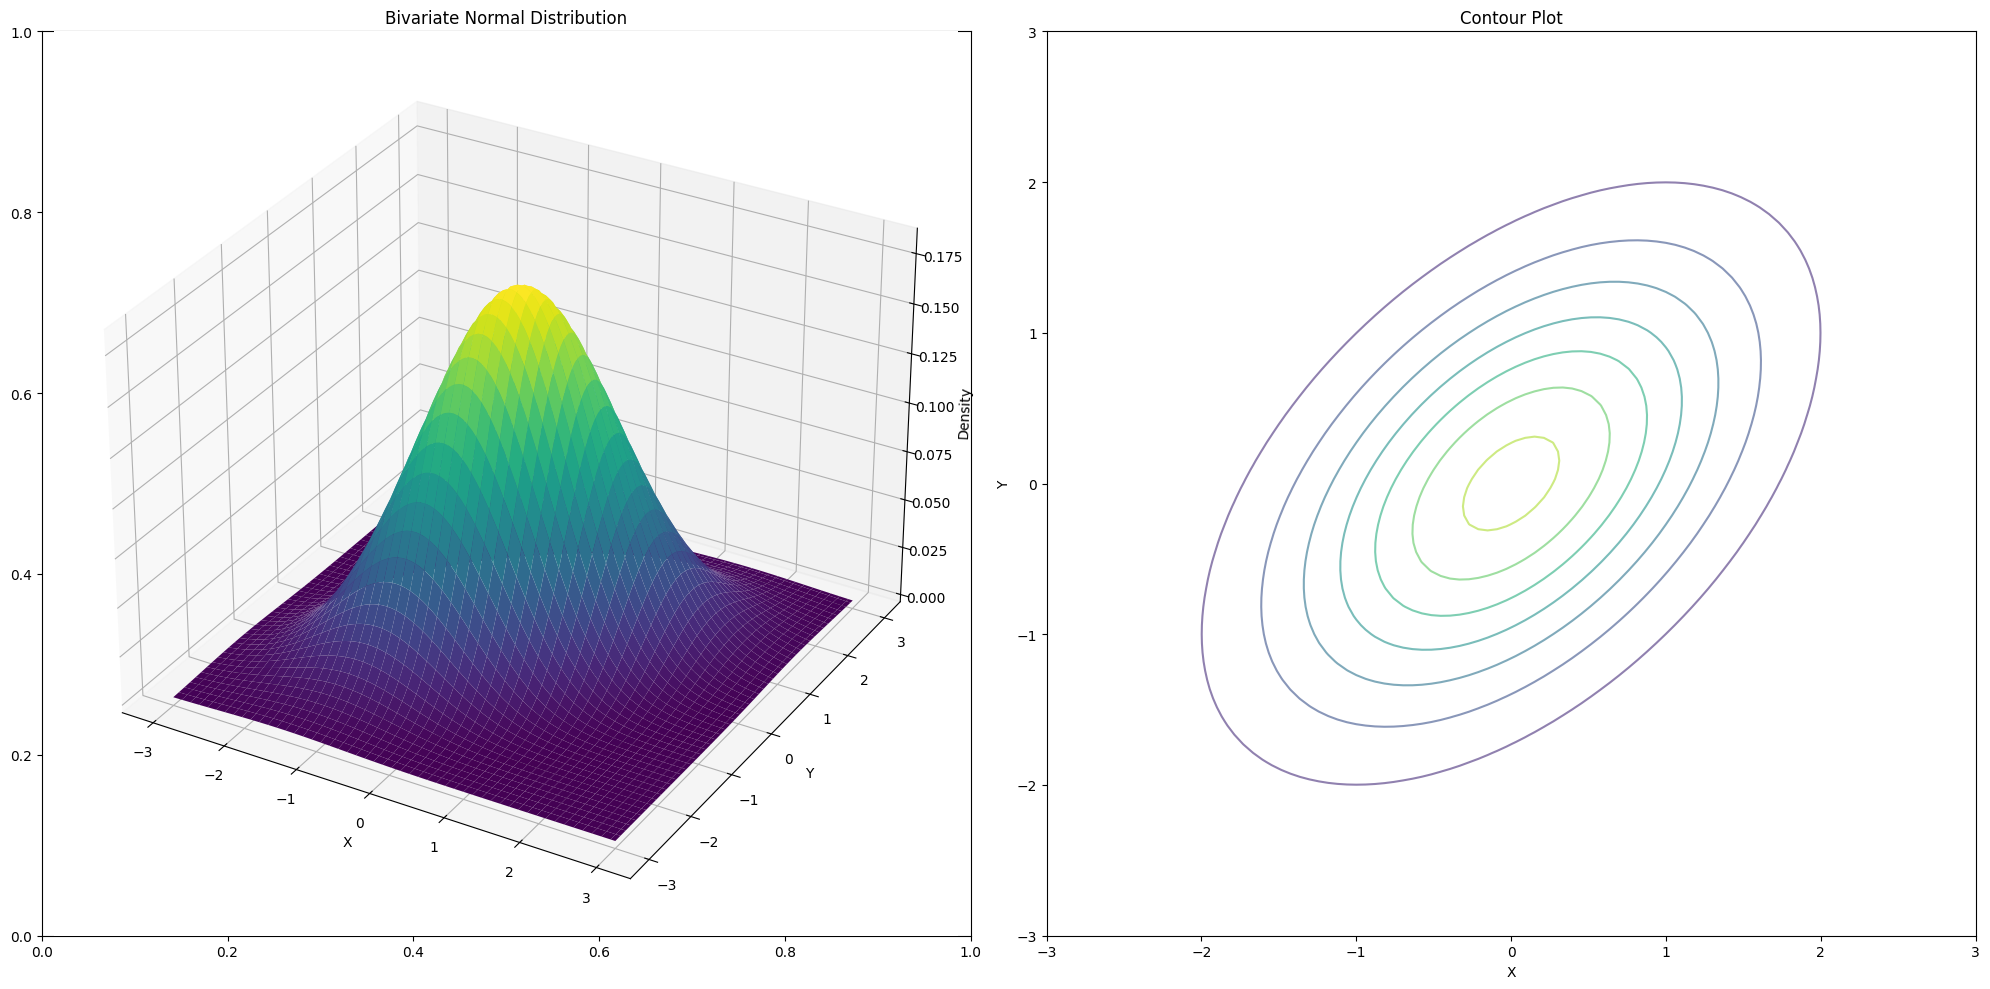

In [45]:
rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])

# 3d plot of the bivariate normal distribution
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = rv.pdf(pos)

fig, axs = plt.subplots(1, 2, figsize=(20, 10), tight_layout=True)

# 3D plot
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('Bivariate Normal Distribution')

# Contour plot
axs[1].contour(x, y, rv.pdf(pos), alpha=0.6)
axs[1].set_title('Contour Plot')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.show()

In [46]:

def gibbs_sampler(rho, N):
  # In Gibbs we have a 100% acceptance rate
  X = np.zeros(N + 1) 
  Y = np.zeros(N + 1)
  for i in range(N): 
    X[i+1] = rho * Y[i] + np.sqrt(1-rho**2) * np.random.normal(0,1)
    Y[i+1] = rho * X[i+1] + np.sqrt(1-rho**2) * np.random.normal(0,1)
  return X, Y



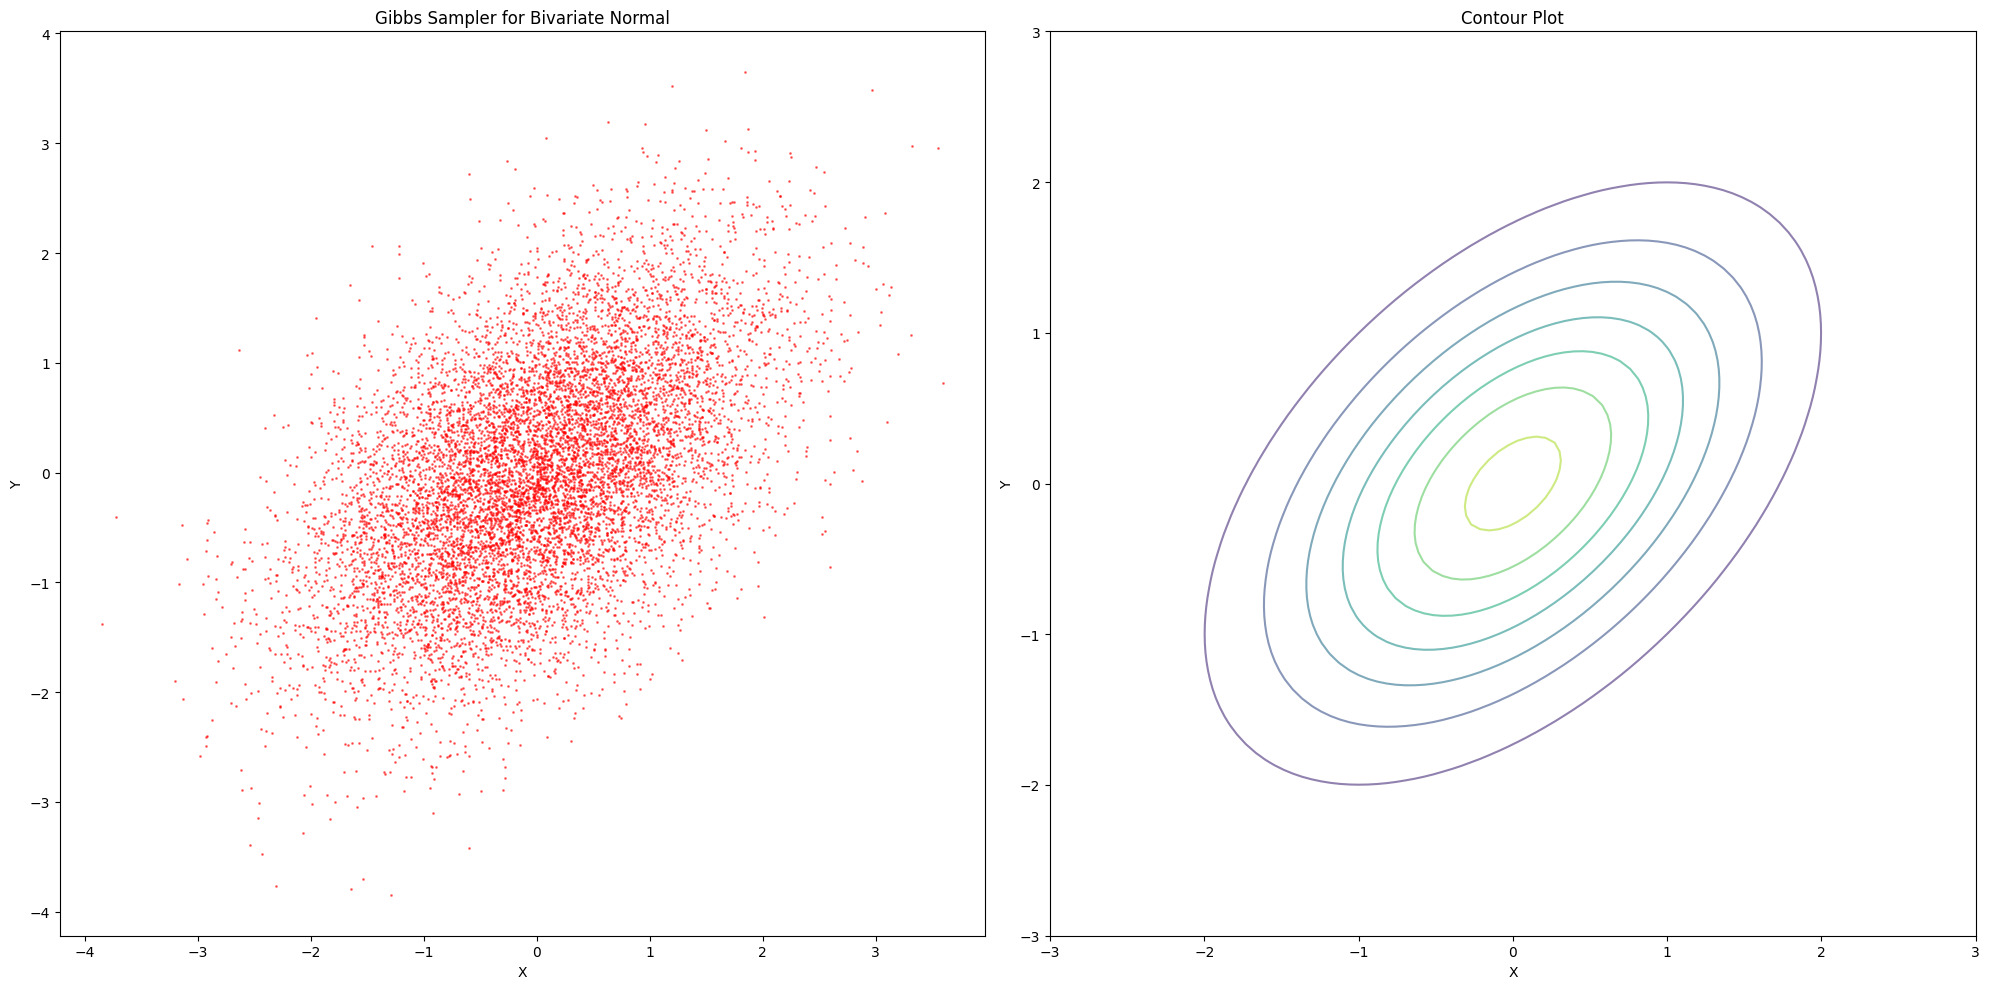

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10), tight_layout=True)

# Scatterplot of samples
axs[0].scatter(X[n:], Y[n:], alpha=0.5, color='red', s=1)
axs[0].set_title('Gibbs Sampler for Bivariate Normal')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')

# Contour plot
axs[1].contour(x, y, rv.pdf(pos), alpha=0.6)
axs[1].set_title('Contour Plot')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Y')

plt.show()

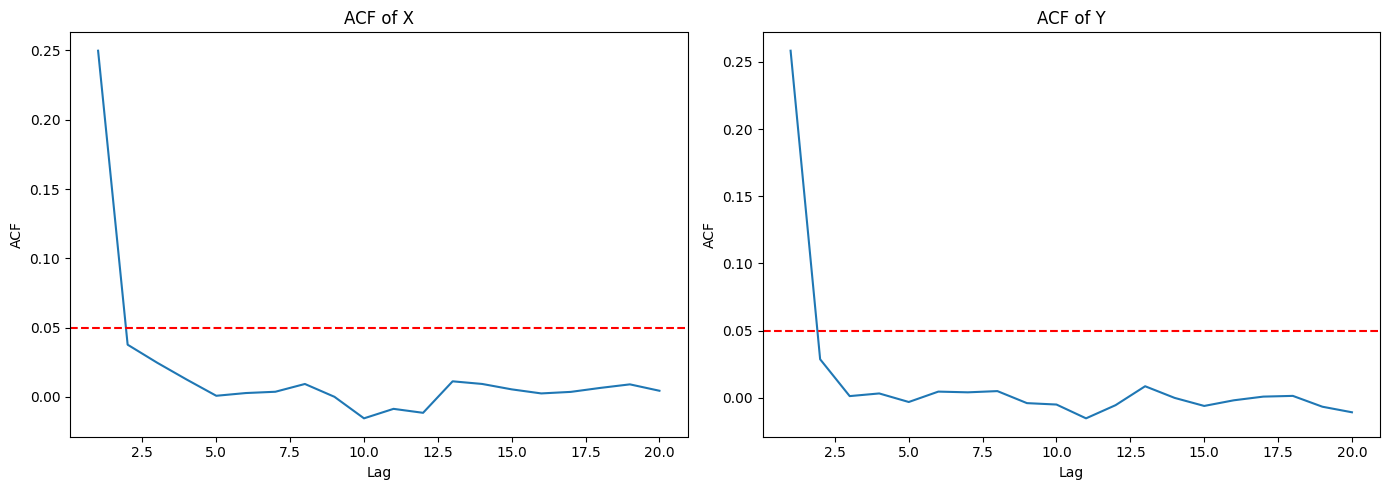

In [48]:
# find acf of X using np.correlate
threshold = 0.05
lags = 20

def autocorr(x, t):
  return np.corrcoef(x[:-t], x[t:])[0, 1]

# plot acf of X and Y for up to 20 lags in a side-by-side subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 5), tight_layout=True)

# ACF of X
acf_values_X = [autocorr(X, t) for t in range(1, lags + 1)]
axs[0].plot(range(1, lags + 1), acf_values_X)
axs[0].axhline(y=threshold, color='r', linestyle='--')
axs[0].set_title('ACF of X')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')

# ACF of Y
acf_values_Y = [autocorr(Y, t) for t in range(1, lags + 1)]
axs[1].plot(range(1, lags + 1), acf_values_Y)
axs[1].axhline(y=threshold, color='r', linestyle='--')
axs[1].set_title('ACF of Y')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('ACF')

plt.show()

X = X[n:]
Y = Y[n:]


In [50]:

# plot first k points in X
def plot_points(X, Y, k):
    x, y = np.mgrid[-3:3:0.01, -3:3:0.01]
    pos = np.dstack((x, y))  # Create a position array for the grid
    rho = 0.5  # Example correlation coefficient, change as needed
    rv = multivariate_normal([0, 0], [[1, rho], [rho, 1]])

    plt.figure(figsize=(10,10))
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
    # # Plot contour
    # plt.contour(x, y, rv.pdf(pos), alpha=0.3)
    
    for i in range(k+1):
      if i > 0:
        plt.plot([X[i-1], X[i]], [Y[i-1], Y[i-1]], 'b-',linewidth=1, alpha=0.5*(i/k)**4)
        plt.plot([X[i], X[i]], [Y[i-1], Y[i]], 'b-',linewidth=1, alpha=0.5*(i/k)**4)
      plt.plot(X[i], Y[i], 'ro',markersize=2)    

    plt.show()

def animate(X, Y):
  widgets.interact(plot_points, X=widgets.fixed(X), Y=widgets.fixed(Y), 
                   k=widgets.IntSlider(min=0, max=20, step=1, value=0), continuous_update=False)
  
animate(X, Y)

interactive(children=(IntSlider(value=0, description='k', max=20), Output()), _dom_classes=('widget-interact',…